In [17]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('Datasets/tips.csv')

The food server of a restaurant recorded data about the **tips** given to the waiters for serving the food. The data recorded by the food server is as follows:

- 1)**total_bill**: Total bill in dollars including taxes
- 2)**tip**: Tip given to waiters in dollars
- 3)**sex**: gender of the person paying the bill
- 4)**smoker**: whether the person smoked or not
- 5)**day**: day of the week
- 6)**time**: lunch or dinner
- 7)**size**: number of people in a table 

In [89]:
df.shape

(244, 7)

In [90]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [93]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Text(0.5, 1.0, 'Feature #1')

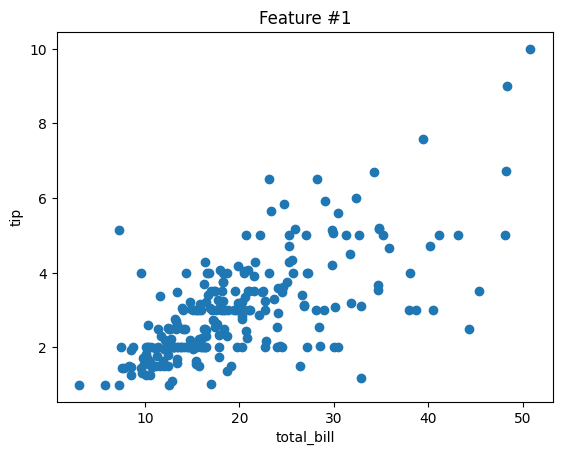

In [94]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('Feature #1')

In [95]:
figure = px.scatter(data_frame = df, x = 'total_bill', 
                    y = 'tip', size = 'size', color = 'day',
                   trendline = 'ols')
figure.show()

In [96]:
figure = px.scatter(data_frame = df, x = 'total_bill', 
                    y = 'tip', size = 'size', color = 'sex',
                   trendline = 'ols')
figure.show()

In [97]:
figure = px.scatter(data_frame = df, x = 'total_bill', 
                    y = 'tip', size = 'size', color = 'time',
                   trendline = 'ols')
figure.show()

(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

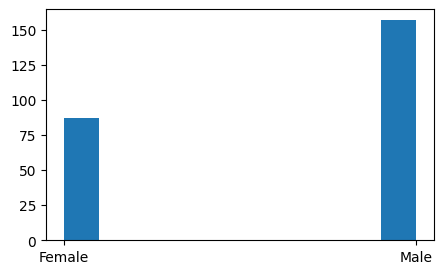

In [98]:
plt.figure(figsize=(5,3))
plt.hist(df['sex'])

In [99]:
figure = px.pie(df, values = 'tip', names = 'sex', hole = 0.5)
figure.show()

In [100]:
figure = px.pie(df, values = 'tip', names = 'day', hole = 0.5)
figure.show()

In [101]:
figure = px.pie(df, values = 'tip', names = 'smoker', hole = 0.5)
figure.show()

In [102]:
figure = px.pie(df, values = 'tip', names = 'time', hole = 0.5)
figure.show()

Before training a waiter tips prediction model, I will do some data transformation by transforming the categorical values into numerical values:

In [103]:
print('sex: ', df['sex'].unique())
print('smoker: ', df['smoker'].unique())
print('day: ', df['day'].unique())
print('time: ', df['time'].unique())

sex:  ['Female' 'Male']
smoker:  ['No' 'Yes']
day:  ['Sun' 'Sat' 'Thur' 'Fri']
time:  ['Dinner' 'Lunch']


In [104]:
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Sun': 0, 'Sat': 1,'Thur': 2,'Fri': 3})
df['time'] = df['time'].map({'Dinner': 0, 'Lunch': 1})

In [105]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


In [106]:
X = df.drop('tip', axis = 1)
y = df['tip']

In [107]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,0,0,2
1,10.34,1,0,0,0,3
2,21.01,1,0,0,0,3
3,23.68,1,0,0,0,2
4,24.59,0,0,0,0,4
...,...,...,...,...,...,...
239,29.03,1,0,1,0,3
240,27.18,0,1,1,0,2
241,22.67,1,1,1,0,2
242,17.82,1,0,1,0,2


In [108]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [112]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.59, 0, 0, 0, 0, 4]])
model.predict(features)

array([3.62989808])